# Set environment

In [80]:
source("config_path.R")

# Import data

## 01 Count data

In [81]:
attach(file.path(OUTDIR, "HTS-GroupAll-DESeq.RData"))

The following objects are masked from file:/shared_space/TA_clint/analysis_output/out/HTS-GroupAll-DESeq.RData (pos = 3):

    columnData, columnData_rmF, countData, countData_rm0F, dds,
    gene_exp, res_media_h99, res_media_h992, res_media_mar,
    res_media_mar2, res_strain_tc, res_strain_tc2, res_strain_ypd,
    res_strain_ypd2, rlgexp, vomexp, vstexp

The following objects are masked from file:/shared_space/TA_clint/analysis_output/out/HTS-GroupAll-DESeq.RData (pos = 6):

    columnData, countData, dds, gene_exp, res_media_h99, res_media_mar,
    res_strain_tc, res_strain_ypd, rlgexp, vomexp, vstexp



## 02 Read in the pathway genesets of cne h99

The data is downloaded from [FungiDB](http://fungidb.org) with [this strategy](http://fungidb.org/fungidb/im.do?s=b7b27b78af2797b1).

In [82]:
### read in the data
tmp <- read_tsv(file.path(INFODIR, "pathway_cne_h99_fromFungidb.txt"), col_names = TRUE)
tmp <- tmp %>% dplyr::select(-X5)

### change the column name
colnames(tmp) <- c("id", "name", "gene", "source")
dat_pathway_cne_h99 <- tmp

### show the first two rows
head(dat_pathway_cne_h99, 2)

Warning message:
“Missing column names filled in: 'X5' [5]”Parsed with column specification:
cols(
  `[Pathway Id]` = col_character(),
  `[Pathway]` = col_character(),
  `[Genes]` = col_character(),
  `[Pathway Source]` = col_character(),
  X5 = col_character()
)


id,name,gene,source
ec00010,Glycolysis / Gluconeogenesis,CNAG_00038 | CNAG_00057 | CNAG_00515 | CNAG_00735 | CNAG_00797 | CNAG_01078 | CNAG_01120 | CNAG_01675 | CNAG_01820 | CNAG_01955 | CNAG_02035 | CNAG_02377 | CNAG_02489 | CNAG_02736 | CNAG_02903 | CNAG_03072 | CNAG_03358 | CNAG_03916 | CNAG_04217 | CNAG_04523 | CNAG_04659 | CNAG_04676 | CNAG_05059 | CNAG_05113 | CNAG_06035 | CNAG_06313 | CNAG_06628 | CNAG_06699 | CNAG_06770 | CNAG_07004 | CNAG_07316 | CNAG_07559 | CNAG_07660 | CNAG_07745,KEGG
ec00020,Citrate cycle (TCA cycle),CNAG_00061 | CNAG_00747 | CNAG_01120 | CNAG_01264 | CNAG_01657 | CNAG_01680 | CNAG_02736 | CNAG_03225 | CNAG_03226 | CNAG_03266 | CNAG_03375 | CNAG_03596 | CNAG_03674 | CNAG_03920 | CNAG_04189 | CNAG_04217 | CNAG_04468 | CNAG_04535 | CNAG_04640 | CNAG_05059 | CNAG_05236 | CNAG_05907 | CNAG_07004 | CNAG_07356 | CNAG_07363 | CNAG_07660 | CNAG_07851 | CNAG_07944,KEGG


In [4]:
#dat_pathway_cne_h99_kegg <- dat_pathway_cne_h99 %>% dplyr::filter(source == "KEGG")

# pathway gene sets

In [83]:
### arrange the data frame
dat <- dat_pathway_cne_h99
dat <- dat %>% dplyr::select(-source)              # we don't need the column source
dat <- dat %>% unite(label, id, name, sep = " | ") # combine the column id and name
head(dat, 2)

label,gene
ec00010 | Glycolysis / Gluconeogenesis,CNAG_00038 | CNAG_00057 | CNAG_00515 | CNAG_00735 | CNAG_00797 | CNAG_01078 | CNAG_01120 | CNAG_01675 | CNAG_01820 | CNAG_01955 | CNAG_02035 | CNAG_02377 | CNAG_02489 | CNAG_02736 | CNAG_02903 | CNAG_03072 | CNAG_03358 | CNAG_03916 | CNAG_04217 | CNAG_04523 | CNAG_04659 | CNAG_04676 | CNAG_05059 | CNAG_05113 | CNAG_06035 | CNAG_06313 | CNAG_06628 | CNAG_06699 | CNAG_06770 | CNAG_07004 | CNAG_07316 | CNAG_07559 | CNAG_07660 | CNAG_07745
ec00020 | Citrate cycle (TCA cycle),CNAG_00061 | CNAG_00747 | CNAG_01120 | CNAG_01264 | CNAG_01657 | CNAG_01680 | CNAG_02736 | CNAG_03225 | CNAG_03226 | CNAG_03266 | CNAG_03375 | CNAG_03596 | CNAG_03674 | CNAG_03920 | CNAG_04189 | CNAG_04217 | CNAG_04468 | CNAG_04535 | CNAG_04640 | CNAG_05059 | CNAG_05236 | CNAG_05907 | CNAG_07004 | CNAG_07356 | CNAG_07363 | CNAG_07660 | CNAG_07851 | CNAG_07944


In [84]:
### use str_split to create a list of gene vector
lst <- str_split(dat$gene, "\\|")
lst <- lapply(lst, trimws)

### assign the pathway name to as the name of the list
names(lst) <- dat$label
genesets_cne_h99 <- lst

### print the results
head(genesets_cne_h99, 2)

$`ec00010 | Glycolysis / Gluconeogenesis`
 [1] "CNAG_00038" "CNAG_00057" "CNAG_00515" "CNAG_00735" "CNAG_00797"
 [6] "CNAG_01078" "CNAG_01120" "CNAG_01675" "CNAG_01820" "CNAG_01955"
[11] "CNAG_02035" "CNAG_02377" "CNAG_02489" "CNAG_02736" "CNAG_02903"
[16] "CNAG_03072" "CNAG_03358" "CNAG_03916" "CNAG_04217" "CNAG_04523"
[21] "CNAG_04659" "CNAG_04676" "CNAG_05059" "CNAG_05113" "CNAG_06035"
[26] "CNAG_06313" "CNAG_06628" "CNAG_06699" "CNAG_06770" "CNAG_07004"
[31] "CNAG_07316" "CNAG_07559" "CNAG_07660" "CNAG_07745"

$`ec00020 | Citrate cycle (TCA cycle)`
 [1] "CNAG_00061" "CNAG_00747" "CNAG_01120" "CNAG_01264" "CNAG_01657"
 [6] "CNAG_01680" "CNAG_02736" "CNAG_03225" "CNAG_03226" "CNAG_03266"
[11] "CNAG_03375" "CNAG_03596" "CNAG_03674" "CNAG_03920" "CNAG_04189"
[16] "CNAG_04217" "CNAG_04468" "CNAG_04535" "CNAG_04640" "CNAG_05059"
[21] "CNAG_05236" "CNAG_05907" "CNAG_07004" "CNAG_07356" "CNAG_07363"
[26] "CNAG_07660" "CNAG_07851" "CNAG_07944"

# Gene set analysis

In [7]:
head(assay(rlgexp), 3)

,A_1,A_13,A_14,A_15,A_2,A_3,B_16,B_26,B_27,B_38,⋯,G_21,G_22,G_23,G_9,H_12,H_24,H_35,H_36,H_45,H_47
CNAG_04548,-0.435914755,-0.5274616,-0.49034692,-0.52654796,-0.01818156,-0.48860416,-0.7122624,-0.52744665,-0.7102732,-0.5933108,⋯,-0.75721308,-0.4911104,-0.67904396,-7.167824e-01,-0.72331627,-0.58085664,-0.3862673,-0.2198443,-0.4485733,-0.6957191
CNAG_07304,3.510385611,3.2608655,3.77666300,3.63165025,3.45968273,3.78346071,3.6004613,3.45357394,3.0966625,3.2877154,⋯,3.82366668,3.6500694,4.18447867,3.709058e+00,3.60820859,3.69199963,3.2994106,3.4888412,3.8258849,3.7629578
CNAG_07305,0.005886359,-0.0781567,-0.04408418,-0.07731794,-0.01312995,-0.04248427,-0.1019522,-0.07814297,-0.2273109,-0.1444827,⋯,0.09878146,-0.1583978,-0.03876293,-6.897348e-05,0.07780108,0.05205749,-0.1497903,-0.1358253,0.1351662,-0.0714855


In [8]:
colData(rlgexp)

DataFrame with 48 rows and 11 columns
           Label   Strain    Media experiment_person prop.gene prop.nofeat
     <character> <factor> <factor>       <character> <numeric>   <numeric>
A_1          A_1      H99      YPD              expA 0.6151899  0.03635624
A_13        A_13      H99       TC              expA 0.6476637  0.05793771
A_14        A_14      H99       TC              expA 0.6270156  0.05659609
A_15        A_15      H99       TC              expA 0.6237729  0.06518918
A_2          A_2      H99      YPD              expA 0.6145219  0.04734133
...          ...      ...      ...               ...       ...         ...
H_24        H_24    mar1d       TC              expA 0.6046012   0.3328785
H_35        H_35    mar1d      YPD              expB 0.5728180   0.3446321
H_36        H_36    mar1d      YPD              expB 0.7068354   0.2421607
H_45        H_45    mar1d       TC              expB 0.5427842   0.3771188
H_47        H_47    mar1d       TC              expB 0.5127968

## 01 YPD -> TC in H99

In [85]:
rld <- rlgexp
gageres_media_h99 <- gage::gage(
    assay(rld),
    gsets = genesets_cne_h99,
    use.fold = FALSE,
                      
    ### reference condition or phenotype 
    ### (i.e. the control group) 
    ref  = which(colData(rld)[["Group"]] == "YPDH99"), 
    
    ### a numeric vector of column numbers for 
    ### the target condition or phenotype 
    ### (i.e.the experiment group)
    samp = which(colData(rld)[["Group"]] == "TCH99"),
    compare = "unpaired",
                        
    ### he effective gene set size, 
    ### i.e. the number of genes included in the gene set test
    set.size = c(10, 500),
                      
    ### provide two sided test "greater" & "less"
    same.dir = TRUE)

## 02 YPD -> TC in mar1d

In [86]:
rld <- rlgexp
gageres_media_mar <- gage::gage(
    assay(rld),
    gsets = genesets_cne_h99,
    use.fold = FALSE,
                      
    ### reference condition or phenotype 
    ### (i.e. the control group) 
    ref  = which(colData(rld)[["Group"]] == "YPDmar1d"), 
    
    ### a numeric vector of column numbers for 
    ### the target condition or phenotype 
    ### (i.e.the experiment group)
    samp = which(colData(rld)[["Group"]] == "TCmar1d"),
    compare = "unpaired",
                        
    ### he effective gene set size, 
    ### i.e. the number of genes included in the gene set test
    set.size = c(10, 500),
                      
    ### provide two sided test "greater" & "less"
    same.dir = TRUE)

## 03 H99 vs mar1d in YPD

In [87]:
rld <- rlgexp
gageres_strain_ypd <- gage::gage(
    assay(rld),
    gsets = genesets_cne_h99,
    use.fold = FALSE,
                      
    ### reference condition or phenotype 
    ### (i.e. the control group) 
    ref  = which(colData(rld)[["Group"]] == "YPDH99"), 
    
    ### a numeric vector of column numbers for 
    ### the target condition or phenotype 
    ### (i.e.the experiment group)
    samp = which(colData(rld)[["Group"]] == "YPDmar1d"),
    compare = "unpaired",
                        
    ### he effective gene set size, 
    ### i.e. the number of genes included in the gene set test
    set.size = c(10, 500),
                      
    ### provide two sided test "greater" & "less"
    same.dir = TRUE)

## 04 H99 vs mar1d in TC

In [88]:
rld <- rlgexp
gageres_strain_tc <- gage::gage(
    assay(rld),
    gsets = genesets_cne_h99,
    use.fold = FALSE,
                      
    ### reference condition or phenotype 
    ### (i.e. the control group) 
    ref  = which(colData(rld)[["Group"]] == "TCH99"), 
    
    ### a numeric vector of column numbers for 
    ### the target condition or phenotype 
    ### (i.e.the experiment group)
    samp = which(colData(rld)[["Group"]] == "TCmar1d"),
    compare = "unpaired",
                        
    ### he effective gene set size, 
    ### i.e. the number of genes included in the gene set test
    set.size = c(10, 500),
                      
    ### provide two sided test "greater" & "less"
    same.dir = TRUE)

# Store the results

In [89]:
#outfile <- file.path(OUTDIR, "HTS-GroupB-DESeq.RData")
outfile <- file.path(OUTDIR, "HTS-GroupAll-gage.RData")

save(gageres_media_h99,
     gageres_media_mar,
     gageres_strain_ypd,
     gageres_strain_tc,
     genesets_cne_h99,
     file = outfile)

tools::md5sum(outfile)

/shared_space/TA_clint/analysis_output/out/HTS-GroupAll-gage.RData 
                                "f52d577446d5e516f336f8787a3f03ff"

-----

# Another section

In [2]:
attach(file.path(OUTDIR, "HTS-GroupAll-gage.RData"))

In [1]:
source("config_path.R")

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,


In [3]:
gageres_media_h99$greater %>% as.data.frame %>% rownames_to_column("name") %>% head

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
ec00053 | Ascorbate and aldarate metabolism,0.0000531879,3.955418,0.0000531879,0.01565848,100,0.0000531879
PWY-7734 | quinoxaline-2-carboxylate biosynthesis,0.0001108136,3.834143,0.0001108136,0.01565848,51,0.0001108136
ec00051 | Fructose and mannose metabolism,0.0001641801,3.655732,0.0001641801,0.01565848,103,0.0001641801
PWY-5257 | superpathway of pentose and pentitol degradation,0.0001887791,3.664700,0.0001887791,0.01565848,58,0.0001887791
SUCROSEUTIL2-PWY | sucrose degradation VII (sucrose 3-dehydrogenase),0.0002262420,3.632852,0.0002262420,0.01565848,49,0.0002262420
PWY-1121 | suberin monomers biosynthesis,0.0002741080,3.581155,0.0002741080,0.01565848,48,0.0002741080


In [5]:
great_media_h99  <- gageres_media_h99[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)
great_media_mar  <- gageres_media_mar[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)
great_strain_ypd <- gageres_strain_ypd[["greater"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)
great_strain_tc  <- gageres_strain_tc[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)

In [111]:
great_media_h99 %>% nrow
great_media_mar %>% nrow
great_strain_ypd%>% nrow
great_strain_tc%>% nrow

[1] 124

[1] 146

[1] 91

[1] 0

In [ ]:
intersect(great_media_h99, great_media_h99)
setdiff(great_media_h99, great_media_h99)
setdiff(great_media_h99, great_media_h99)

In [112]:
less_media_h99  <- gageres_media_h99[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)
less_media_mar  <- gageres_media_mar[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)
less_strain_ypd <- gageres_strain_ypd[["less"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)
less_strain_tc  <- gageres_strain_tc[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(q.val < 0.05)

In [113]:
less_media_h99 %>% nrow
less_media_mar %>% nrow
less_strain_ypd%>% nrow
less_strain_tc%>% nrow

[1] 72

[1] 103

[1] 0

[1] 0

In [115]:
setdiff(less_media_mar$name, less_media_h99$name)

[1] "PWY-7483 | elloramycin biosynthesis"                                              
 [2] "PWY-7485 | tetracenomycin C biosynthesis"                                         
 [3] "PWY-7653 | griseofulvin biosynthesis"                                             
 [4] "PWY-5209 | methyl-coenzyme M oxidation to CO<sub>2</sub>"                         
 [5] "PWY-5059 | pinobanksin biosynthesis"                                              
 [6] "PWY-7235 | superpathway of ubiquinol-6 biosynthesis (eukaryotic)"                 
 [7] "PWY-7230 | ubiquinol-6 biosynthesis from 4-aminobenzoate (eukaryotic)"            
 [8] "PWY-7233 | ubiquinol-6 bypass biosynthesis (eukaryotic)"                          
 [9] "PWY-7298 | nevadensin biosynthesis"                                               
[10] "PWY-5305 | bixin biosynthesis"                                                    
[11] "PWY-6339 | syringate degradation"                                                 
[12] "PWY-7659 | viridicatumtoxin biosynthesis"                                         
[13] "PWY-5290 | secologanin and strictosidine biosynthesis"                            
[14] "PWY-6978 | plastoquinol-9 biosynthesis II"                                        
[15] "PWY-5287 | sanguinarine and macarpine biosynthesis"                               
[16] "PWY-5773 | gossypol biosynthesis"                                                 
[17] "PWY-601 | glucosinolate biosynthesis from tryptophan"                             
[18] "PWY-7325 | salvigenin biosynthesis"                                               
[19] "PWY-7607 | meleagrin biosynthesis"                                                
[20] "PWY-7608 | neoxaline biosynthesis"                                                
[21] "PWY-7629 | yatein biosynthesis II"                                                
[22] "PWY-7739 | aucuparin biosynthesis"                                                
[23] "PWY-6736 | sulfur volatiles biosynthesis"                                         
[24] "ec00340 | Histidine metabolism"                                                   
[25] "PWY-7826 | <i>Amaryllidacea</i> alkaloids biosynthesis"                           
[26] "ERGOSTEROL-SYN-PWY | superpathway of ergosterol biosynthesis I"                   
[27] "PWY0-162 | superpathway of pyrimidine ribonucleotides <i>de novo</i> biosynthesis"
[28] "PWY-5975 | furaneol biosynthesis"                                                 
[29] "PWY-7735 | echinomycin and triostin A biosynthesis"                               
[30] "PWY-7737 | thiocoraline biosynthesis"                                             
[31] "PWY-7517 | brassicicene C biosynthesis"                                           
[32] "PWY-6126 | superpathway of adenosine nucleotides <i>de novo</i> biosynthesis II"  
[33] "PWY-7229 | superpathway of adenosine nucleotides <i>de novo</i> biosynthesis I"

In [114]:
setdiff(less_media_h99$name, less_media_mar$name)

[1] "PWY-3001 | superpathway of L-isoleucine biosynthesis I"                 
[2] "ARG+POLYAMINE-SYN | superpathway of arginine and polyamine biosynthesis"

In [4]:
 <- gageres_media_h99[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp2 <- gageres_media_mar[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
less_strain_ypd <- gageres_strain_ypd[["less"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
less_strain_tc  <- gageres_strain_tc[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected assignment
1:  <-
     ^


In [109]:
head(gageres_strain_ypd[["less"]])

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
PWY-6848 | rutin degradation,0.006328451,-2.572474,0.006328451,0.4794867,31,0.006328451
PWY-7018 | paromomycin biosynthesis,0.007485135,-2.485476,0.007485135,0.4794867,42,0.007485135
ec00051 | Fructose and mannose metabolism,0.007499368,-2.453300,0.007499368,0.4794867,103,0.007499368
PWY-6527 | stachyose degradation,0.007587231,-2.526977,0.007587231,0.4794867,23,0.007587231
ec00561 | Glycerolipid metabolism,0.008605073,-2.438642,0.008605073,0.4794867,37,0.008605073
ec00500 | Starch and sucrose metabolism,0.012177318,-2.300193,0.012177318,0.4794867,41,0.012177318


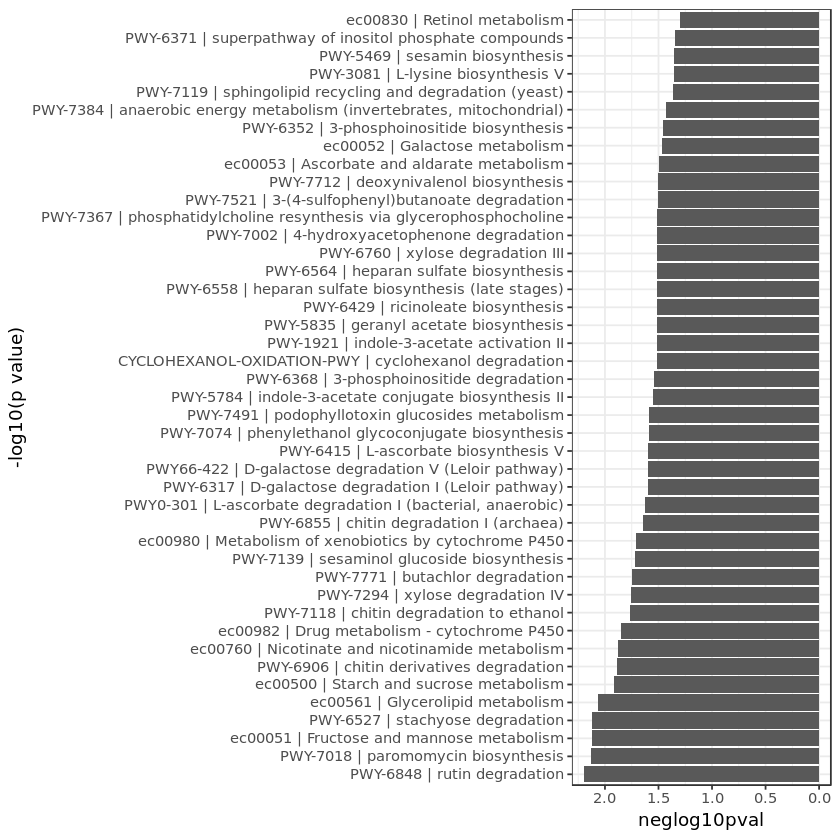

In [106]:
tmp <- tmp3 %>% mutate(neglog10pval = -log10(p.val)) %>% arrange(desc(neglog10pval))
tmp$name <- factor(tmp$name, levels = tmp$name)
gp <- ggplot(tmp, aes(x = name, y = neglog10pval)) + geom_bar(stat="identity") + scale_y_reverse() + coord_flip() + theme_bw() + labs(x = "-log10(p value)")
print(gp)

In [94]:
tmp3 

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
PWY-6848 | rutin degradation,0.006328451,-2.572474,0.006328451,0.4794867,31,0.006328451
PWY-7018 | paromomycin biosynthesis,0.007485135,-2.485476,0.007485135,0.4794867,42,0.007485135
ec00051 | Fructose and mannose metabolism,0.007499368,-2.453300,0.007499368,0.4794867,103,0.007499368
PWY-6527 | stachyose degradation,0.007587231,-2.526977,0.007587231,0.4794867,23,0.007587231
ec00561 | Glycerolipid metabolism,0.008605073,-2.438642,0.008605073,0.4794867,37,0.008605073
ec00500 | Starch and sucrose metabolism,0.012177318,-2.300193,0.012177318,0.4794867,41,0.012177318
PWY-6906 | chitin derivatives degradation,0.013011827,-2.344862,0.013011827,0.4794867,16,0.013011827
ec00760 | Nicotinate and nicotinamide metabolism,0.013294381,-2.262702,0.013294381,0.4794867,38,0.013294381
ec00982 | Drug metabolism - cytochrome P450,0.014026814,-2.271897,0.014026814,0.4794867,23,0.014026814
PWY-7118 | chitin degradation to ethanol,0.017209084,-2.209652,0.017209084,0.4794867,17,0.017209084


In [93]:
intersect(tmp3$name, tmp4$name)

[1] "PWY-7018 | paromomycin biosynthesis"                                  
 [2] "PWY-7294 | xylose degradation IV"                                     
 [3] "PWY-7139 | sesaminol glucoside biosynthesis"                          
 [4] "PWY-6855 | chitin degradation I (archaea)"                            
 [5] "PWY-7074 | phenylethanol glycoconjugate biosynthesis"                 
 [6] "PWY-7491 | podophyllotoxin glucosides metabolism"                     
 [7] "PWY-5784 | indole-3-acetate conjugate biosynthesis II"                
 [8] "PWY-7521 | 3-(4-sulfophenyl)butanoate degradation"                    
 [9] "PWY-7712 | deoxynivalenol biosynthesis"                               
[10] "PWY-7384 | anaerobic energy metabolism (invertebrates, mitochondrial)"
[11] "PWY-5469 | sesamin biosynthesis"

In [20]:
print(setdiff(tmp2$name, tmp1$name) %>% sort)

 [1] "ALL-CHORISMATE-PWY | superpathway of chorismate metabolism"                                               
 [2] "ec00360 | Phenylalanine metabolism"                                                                       
 [3] "ec00624 | Polycyclic aromatic hydrocarbon degradation"                                                    
 [4] "ec00627 | Aminobenzoate degradation"                                                                      
 [5] "ec00941 | Flavonoid biosynthesis"                                                                         
 [6] "ec00945 | Stilbenoid, diarylheptanoid and gingerol biosynthesis"                                          
 [7] "P105-PWY | TCA cycle IV (2-oxoglutarate decarboxylase)"                                                   
 [8] "PWY-5910 | superpathway of geranylgeranyldiphosphate biosynthesis I (via mevalonate)"                     
 [9] "PWY-6969 | TCA cycle V (2-oxoglutarate:ferredoxin oxidoreductase)"                        

In [ ]:
print(setdiff(tmp4$name, tmp3$name) %>% sort)

-----

In [33]:
head(gageres_strain_ypd[["greater"]])

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
ec00230 | Purine metabolism,3.337399e-06,4.616580,3.337399e-06,0.002833452,118,3.337399e-06
"PRPP-PWY | superpathway of histidine, purine, and pyrimidine biosynthesis",1.143999e-05,4.439905,1.143999e-05,0.004856276,52,1.143999e-05
PWY-7653 | griseofulvin biosynthesis,4.017730e-05,4.071243,4.017730e-05,0.011370175,68,4.017730e-05
PWY-5209 | methyl-coenzyme M oxidation to CO<sub>2</sub>,6.941471e-05,3.930436,6.941471e-05,0.014733273,65,6.941471e-05
PWY-5059 | pinobanksin biosynthesis,1.826725e-04,3.669988,1.826725e-04,0.020521246,61,1.826725e-04
PWY-7735 | echinomycin and triostin A biosynthesis,1.895738e-04,3.615598,1.895738e-04,0.020521246,103,1.895738e-04


In [73]:
tmp3 <- gageres_strain_ypd[["greater"]] %>% 
    as.data.frame %>% 
    rownames_to_column("name") %>% 
    filter(p.val < 0.05) %>%
    arrange(p.val)
tmp4 <- gageres_strain_tc[["greater"]]  %>% 
    as.data.frame %>% 
    rownames_to_column("name") %>% 
    filter(p.val < 0.05) %>%
    arrange(p.val)

In [63]:
tmp3 %>% nrow
tmp4 %>% nrow

[1] 232

[1] 187

In [64]:
intersect(tmp4$name, tmp3$name) %>% length
setdiff(tmp3$name, tmp4$name) %>% length
setdiff(tmp4$name, tmp3$name) %>% length

[1] 99

[1] 133

[1] 88

In [66]:
setdiff(tmp3$name, tmp4$name)

[1] "ec00230 | Purine metabolism"                                                                              
  [2] "PWY-6407 | yersiniabactin biosynthesis"                                                                   
  [3] "PWY-6408 | pyochelin biosynthesis"                                                                        
  [4] "PWY-6640 | salicylate degradation IV"                                                                     
  [5] "ec00627 | Aminobenzoate degradation"                                                                      
  [6] "PWY-7659 | viridicatumtoxin biosynthesis"                                                                 
  [7] "PWY-7706 | dapdiamides biosynthesis"                                                                      
  [8] "PWY-7673 | fusarin C biosynthesis"                                                                        
  [9] "PWY-6515 | phloridzin biosynthesis"                                                                       
 [10] "PWY-5184 | toluene degradation VI (anaerobic)"                                                            
 [11] "ERGOSTEROL-SYN-PWY | superpathway of ergosterol biosynthesis I"                                           
 [12] "PWY1-3 | polyhydroxybutanoate biosynthesis"                                                               
 [13] "PWY-7656 | <i>Spodoptera littoralis</i> pheromone biosynthesis"                                           
 [14] "ec00942 | Anthocyanin biosynthesis"                                                                       
 [15] "PWY-7517 | brassicicene C biosynthesis"                                                                   
 [16] "PWY-5846 | colchicine biosynthesis"                                                                       
 [17] "PWY-7317 | superpathway of dTDP-glucose-derived O-antigen building blocks biosynthesis"                   
 [18] "PWY-5965 | fatty acid biosynthesis initiation III"                                                        
 [19] "PWY-5290 | secologanin and strictosidine biosynthesis"                                                    
 [20] "PWY-5287 | sanguinarine and macarpine biosynthesis"                                                       
 [21] "PWY-5773 | gossypol biosynthesis"                                                                         
 [22] "PWY-601 | glucosinolate biosynthesis from tryptophan"                                                     
 [23] "PWY-7325 | salvigenin biosynthesis"                                                                       
 [24] "PWY-7607 | meleagrin biosynthesis"                                                                        
 [25] "PWY-7608 | neoxaline biosynthesis"                                                                        
 [26] "PWY-7629 | yatein biosynthesis II"                                                                        
 [27] "PWY-7739 | aucuparin biosynthesis"                                                                        
 [28] "FASYN-INITIAL-PWY | superpathway of fatty acid biosynthesis initiation (E. coli)"                         
 [29] "PWY-6978 | plastoquinol-9 biosynthesis II"                                                                
 [30] "PWY-7230 | ubiquinol-6 biosynthesis from 4-aminobenzoate (eukaryotic)"                                    
 [31] "PWY-7233 | ubiquinol-6 bypass biosynthesis (eukaryotic)"                                                  
 [32] "PWY-7402 | benzoate fermentation (to acetate and cyclohexane carboxylate)"                                
 [33] "PWY0-162 | superpathway of pyrimidine ribonucleotides <i>de novo</i> biosynthesis"                        
 [34] "PWY-7601 | arachidonate biosynthesis IV (8-detaturase, lower eukaryotes)"                                 
 [35] "PWY-7602 | icosapentaenoate biosynthesis V (8-desaturase, lower eukaryotes)"                              
 [36] "PWY-7

In [67]:
print("----")

[1] "----"


In [77]:
tmp3 <- gageres_strain_ypd[["less"]] %>% 
    as.data.frame %>% 
    rownames_to_column("name") %>% 
    filter(p.val < 0.05) %>%
    arrange(p.val)
tmp4 <- gageres_strain_tc[["less"]]  %>% 
    as.data.frame %>% 
    rownames_to_column("name") %>% 
    filter(p.val < 0.05) %>%
    arrange(p.val)

In [78]:
intersect(tmp4$name, tmp3$name) %>% length
setdiff(tmp3$name, tmp4$name) %>% length
setdiff(tmp4$name, tmp3$name) %>% length

[1] 11

[1] 32

[1] 13

In [79]:
intersect(tmp4$name, tmp3$name)

[1] "PWY-7384 | anaerobic energy metabolism (invertebrates, mitochondrial)"
 [2] "PWY-7294 | xylose degradation IV"                                     
 [3] "PWY-7521 | 3-(4-sulfophenyl)butanoate degradation"                    
 [4] "PWY-7712 | deoxynivalenol biosynthesis"                               
 [5] "PWY-6855 | chitin degradation I (archaea)"                            
 [6] "PWY-7139 | sesaminol glucoside biosynthesis"                          
 [7] "PWY-5784 | indole-3-acetate conjugate biosynthesis II"                
 [8] "PWY-5469 | sesamin biosynthesis"                                      
 [9] "PWY-7018 | paromomycin biosynthesis"                                  
[10] "PWY-7074 | phenylethanol glycoconjugate biosynthesis"                 
[11] "PWY-7491 | podophyllotoxin glucosides metabolism"

In [71]:
setdiff(tmp3$name, tmp4$name)

[1] "PWY-6848 | rutin degradation"                                        
 [2] "ec00051 | Fructose and mannose metabolism"                           
 [3] "PWY-6527 | stachyose degradation"                                    
 [4] "ec00561 | Glycerolipid metabolism"                                   
 [5] "ec00500 | Starch and sucrose metabolism"                             
 [6] "PWY-6906 | chitin derivatives degradation"                           
 [7] "ec00760 | Nicotinate and nicotinamide metabolism"                    
 [8] "ec00982 | Drug metabolism - cytochrome P450"                         
 [9] "PWY-7118 | chitin degradation to ethanol"                            
[10] "PWY-7771 | butachlor degradation"                                    
[11] "ec00980 | Metabolism of xenobiotics by cytochrome P450"              
[12] "PWY0-301 | L-ascorbate degradation I (bacterial, anaerobic)"         
[13] "PWY-6317 | D-galactose degradation I (Leloir pathway)"               
[14] "PWY66-422 | D-galactose degradation V (Leloir pathway)"              
[15] "PWY-6415 | L-ascorbate biosynthesis V"                               
[16] "PWY-6368 | 3-phosphoinositide degradation"                           
[17] "CYCLOHEXANOL-OXIDATION-PWY | cyclohexanol degradation"               
[18] "PWY-1921 | indole-3-acetate activation II"                           
[19] "PWY-5835 | geranyl acetate biosynthesis"                             
[20] "PWY-6429 | ricinoleate biosynthesis"                                 
[21] "PWY-6558 | heparan sulfate biosynthesis (late stages)"               
[22] "PWY-6564 | heparan sulfate biosynthesis"                             
[23] "PWY-6760 | xylose degradation III"                                   
[24] "PWY-7002 | 4-hydroxyacetophenone degradation"                        
[25] "PWY-7367 | phosphatidylcholine resynthesis via glycerophosphocholine"
[26] "ec00053 | Ascorbate and aldarate metabolism"                         
[27] "ec00052 | Galactose metabolism"                                      
[28] "PWY-6352 | 3-phosphoinositide biosynthesis"                          
[29] "PWY-7119 | sphingolipid recycling and degradation (yeast)"           
[30] "PWY-3081 | L-lysine biosynthesis V"                                  
[31] "PWY-6371 | superpathway of inositol phosphate compounds"             
[32] "ec00830 | Retinol metabolism"

In [70]:
setdiff(tmp4$name, tmp3$name)

[1] "PWY-6602 | C-glycosylflavone biosynthesis I"                           
 [2] "PWY-7188 | C-glycosylflavone biosynthesis II"                          
 [3] "PWY-7189 | C-glycosylflavone biosynthesis III"                         
 [4] "PWY-5161 | 6'-deoxychalcone metabolism"                                
 [5] "PWY-6266 | superpathway of flavones and derivatives biosynthesis"      
 [6] "PWY-7212 | baicalein metabolism"                                       
 [7] "PWY0-1517 | sedoheptulose bisphosphate bypass"                         
 [8] "PWY-2229 | superpathway of pterocarpan biosynthesis (via formononetin)"
 [9] "PWY-2467 | pisatin biosynthesis"                                       
[10] "PWY-5061 | 6,7,4'-trihydroxyisoflavone biosynthesis"                   
[11] "PWY-6763 | salicortin biosynthesis"                                    
[12] "ec00900 | Terpenoid backbone biosynthesis"                             
[13] "PWY-7430 | indole degradation to anthranil and anthranilate"

# Store the results

In [ ]:
outfile <- file.path(OUTDIR, "res_gage_strain.RData")
save(gageres_Strain_YPD, 
     gageres_Strain_TC,
     file = outfile)

In [17]:
names(gageres_Strain_YPD)

[1] "greater" "less"    "stats"

#

In [18]:
dim(gageres_Strain_YPD$less)

[1] 1860    6

In [19]:
head(gageres_Strain_YPD$greater)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
ec00230 | Purine metabolism,3.645936e-06,4.595210,3.645936e-06,0.001705114,118,3.645936e-06
"PRPP-PWY | superpathway of histidine, purine, and pyrimidine biosynthesis",4.016758e-06,4.704012,4.016758e-06,0.001705114,52,4.016758e-06
PWY-7653 | griseofulvin biosynthesis,3.663564e-05,4.095077,3.663564e-05,0.010367886,68,3.663564e-05
PWY-5209 | methyl-coenzyme M oxidation to CO<sub>2</sub>,5.119700e-05,4.011661,5.119700e-05,0.010866562,65,5.119700e-05
PWY-5059 | pinobanksin biosynthesis,1.431551e-04,3.738606,1.431551e-04,0.015907028,61,1.431551e-04
PWY-7735 | echinomycin and triostin A biosynthesis,1.538789e-04,3.672865,1.538789e-04,0.015907028,103,1.538789e-04


In [20]:
dat <- gageres_Strain_YPD$greater %>% 
    as.data.frame %>% 
    rownames_to_column("pathway") %>%
    filter(p.val < 0.01)
head(dat)

pathway,p.geomean,stat.mean,p.val,q.val,set.size,exp1
ec00230 | Purine metabolism,3.645936e-06,4.595210,3.645936e-06,0.001705114,118,3.645936e-06
"PRPP-PWY | superpathway of histidine, purine, and pyrimidine biosynthesis",4.016758e-06,4.704012,4.016758e-06,0.001705114,52,4.016758e-06
PWY-7653 | griseofulvin biosynthesis,3.663564e-05,4.095077,3.663564e-05,0.010367886,68,3.663564e-05
PWY-5209 | methyl-coenzyme M oxidation to CO<sub>2</sub>,5.119700e-05,4.011661,5.119700e-05,0.010866562,65,5.119700e-05
PWY-5059 | pinobanksin biosynthesis,1.431551e-04,3.738606,1.431551e-04,0.015907028,61,1.431551e-04
PWY-7735 | echinomycin and triostin A biosynthesis,1.538789e-04,3.672865,1.538789e-04,0.015907028,103,1.538789e-04


In [47]:
head(dat$pathway)

[1] "ec00520 | Amino sugar and nucleotide sugar metabolism"               
[2] "PWY-7734 | quinoxaline-2-carboxylate biosynthesis"                   
[3] "ec00053 | Ascorbate and aldarate metabolism"                         
[4] "PWY-5257 | superpathway of pentose and pentitol degradation"         
[5] "SUCROSEUTIL2-PWY | sucrose degradation VII (sucrose 3-dehydrogenase)"
[6] "ec00051 | Fructose and mannose metabolism"

In [150]:
require(scales, quietly = TRUE)
require(visNetwork, quietly = TRUE)

In [37]:
get_jaccard <- function(x, y){
    set_union <- union(x, y)
    set_inter <- intersect(x, y)
    return(length(set_inter) / length(set_union))
}

In [153]:
pathname <- dat$pathway[1:100]
nodes <- data.frame(
    id = 1:length(pathname), 
    label = pathname,
    value = sapply(pathname, function(x){
        length(genesets_cne_h99[[x]])
    }) # end sapply
) # end data.frame

idx_pair <- combn(1:length(pathname), 2, simplify = TRUE)
idx_pair <- t(idx_pair)
head(idx_pair)

1,2
1,3
1,4
1,5
1,6
1,7


In [174]:
edges <- as.data.frame(idx_pair)
colnames(edges)[1:2] <- c("from", "to")

edges$dist_jaccard <- apply(idx_pair, 1, function(idx){
    name01 <- pathname[idx[1]]
    name02 <- pathname[idx[2]]
    get_jaccard(
        genesets_cne_h99[[name01]],
        genesets_cne_h99[[name02]])
})

edges <- edges %>% 
    mutate(prop   = rank(dist_jaccard) / n()) %>%
    filter(prop > 0.9)

edges <- edges %>%
    mutate(width  = rescale(dist_jaccard,  to = c(1, 10))) %>%
    mutate(length = 1 / (width + 1) + 1)

In [175]:
nrow(edges)

[1] 612

In [167]:
head(nodes)
head(edges)

,id,label,value
ec00520 | Amino sugar and nucleotide sugar metabolism,1,ec00520 | Amino sugar and nucleotide sugar metabolism,86
PWY-7734 | quinoxaline-2-carboxylate biosynthesis,2,PWY-7734 | quinoxaline-2-carboxylate biosynthesis,51
ec00053 | Ascorbate and aldarate metabolism,3,ec00053 | Ascorbate and aldarate metabolism,100
PWY-5257 | superpathway of pentose and pentitol degradation,4,PWY-5257 | superpathway of pentose and pentitol degradation,58
SUCROSEUTIL2-PWY | sucrose degradation VII (sucrose 3-dehydrogenase),5,SUCROSEUTIL2-PWY | sucrose degradation VII (sucrose 3-dehydrogenase),49
ec00051 | Fructose and mannose metabolism,6,ec00051 | Fructose and mannose metabolism,103


from,to,dist_jaccard,prop,width,length


```
require(igraph, quietly = TRUE)
gg <- graph_from_data_frame(vertices = nodes, d = edges, directed = FALSE)
visIgraph(gg) %>% 
    visOptions(
        nodesIdSelection = TRUE,
        highlightNearest = list(
            enabled = T, 
            degree = 2, 
            hover = T))
```

In [ ]:
visNetwork(nodes, edges, height = "500px", width = "100%") %>% 
    visOptions(
        nodesIdSelection = TRUE,
        highlightNearest = list(
            enabled = T, 
            degree = 2, 
            hover = T))   

In [92]:
nb <- 10
nodes <- data.frame(id = 1:nb, label = paste("Label", 1:nb),
 group = sample(LETTERS[1:3], nb, replace = TRUE), value = 1:nb,
 title = paste0("<p>", 1:nb,"<br>Tooltip !</p>"), stringsAsFactors = FALSE)

edges <- data.frame(from = trunc(runif(nb)*(nb-1))+1,
 to = trunc(runif(nb)*(nb-1))+1,
 value = rnorm(nb, 10), label = paste("Edge", 1:nb),
 title = paste0("<p>", 1:nb,"<br>Edge Tooltip !</p>"))

head(nodes)
head(edges)

id,label,group,value,title
1,Label 1,A,1,<p>1<br>Tooltip !</p>
2,Label 2,A,2,<p>2<br>Tooltip !</p>
3,Label 3,B,3,<p>3<br>Tooltip !</p>
4,Label 4,C,4,<p>4<br>Tooltip !</p>
5,Label 5,C,5,<p>5<br>Tooltip !</p>
6,Label 6,C,6,<p>6<br>Tooltip !</p>


from,to,value,label,title
8,7,10.809239,Edge 1,<p>1<br>Edge Tooltip !</p>
1,6,9.692573,Edge 2,<p>2<br>Edge Tooltip !</p>
2,5,9.920043,Edge 3,<p>3<br>Edge Tooltip !</p>
6,3,9.476936,Edge 4,<p>4<br>Edge Tooltip !</p>
3,4,8.071829,Edge 5,<p>5<br>Edge Tooltip !</p>
6,2,9.792287,Edge 6,<p>6<br>Edge Tooltip !</p>
